**Problem:** Find the expectation value of the maximum of 3 6-sides dice, both by simulation and calculating it mathematically.

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Simulation

First, we'll do this by simulation. By the Law of Large Numbers, the average base on a large sample of a random variable will converge to the expectation value. To do that we create a distribution object:

In [2]:
die = stats.randint(1, 7)

And roll it `3 * n_rolls` times, putting the results in a 3 by `n_rolls` array. We take the max over each column (the 3 rolls) so we'll have an array of shape `(n_rolls,)`, and calculate the mean.

In [3]:
n_rolls = 10000
maxes = die.rvs((3, n_rolls)).max(axis=0)
maxes.mean()

4.9577

We can plot the results. We'll just use a histogram with fixed bin boundaries.

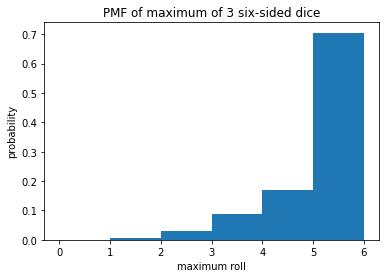

In [4]:
fig, ax = plt.subplots()
ax.hist(maxes,
        bins=np.arange(7),
        density=True)
ax.set_title('PMF of maximum of 3 six-sided dice')
ax.set_xlabel('maximum roll')
ax.set_ylabel('probability');

As an aside, let's see how long different approaches take, the numpy approach above vs. looping over the sets of rolls.

In [5]:
%%timeit
n_rolls = 1000
maxes = []
for i in range(n_rolls):
    maxes.append(die.rvs(3).max())
np.mean(maxes)

64.1 ms ± 566 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%%timeit
n_rolls = 1000
maxes = np.zeros(n_rolls)
for i in range(n_rolls):
    maxes[i] = die.rvs(3).max()
maxes.mean()

65.9 ms ± 989 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
%%timeit
n_rolls = 1000
die.rvs((3, n_rolls)).max(axis=0).mean()

121 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


So the numpy approach was a lot faster, but appending results to a list rather than inserting into a pre-allocated array didn't much matter. Inserting it *should* be faster, but apparently that's not that big of a different.

### Calculation

Do do the calculation we'll do some broadcasting magic. We first create an array with the possible rolls (each equally probable).

In [8]:
d6 = np.arange(1, 7)

If we take the maximum of that array with a version of it reshaped into a column vector, numpy broadcasts both into arrays of shape `(6, 6)`, and takes the maximum of the two broadcast array for each element.


In [9]:
maxes = np.maximum(d6,
                   d6.reshape(6, 1))
maxes

array([[1, 2, 3, 4, 5, 6],
       [2, 2, 3, 4, 5, 6],
       [3, 3, 3, 4, 5, 6],
       [4, 4, 4, 4, 5, 6],
       [5, 5, 5, 5, 5, 6],
       [6, 6, 6, 6, 6, 6]])

If that's not quite clear: these are the shapes of the two array after broadcasting, before doing the `np.maximum`.

In [10]:
print(d6 + np.zeros((6, 1)))
print(d6.reshape(6, 1) + np.zeros(6))

[[1. 2. 3. 4. 5. 6.]
 [1. 2. 3. 4. 5. 6.]
 [1. 2. 3. 4. 5. 6.]
 [1. 2. 3. 4. 5. 6.]
 [1. 2. 3. 4. 5. 6.]
 [1. 2. 3. 4. 5. 6.]]
[[1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6.]]


That combined array represents the 36 possibilities for the max of two die roles.

But really we have 3 rolls, so we need to do a maximum of 3 arrays:

In [16]:
maxes = np.maximum(np.maximum(d6,
                              d6.reshape(-1, 1)),
                   d6.reshape(-1, 1, 1))
maxes

array([[[1, 2, 3, 4, 5, 6],
        [2, 2, 3, 4, 5, 6],
        [3, 3, 3, 4, 5, 6],
        [4, 4, 4, 4, 5, 6],
        [5, 5, 5, 5, 5, 6],
        [6, 6, 6, 6, 6, 6]],

       [[2, 2, 3, 4, 5, 6],
        [2, 2, 3, 4, 5, 6],
        [3, 3, 3, 4, 5, 6],
        [4, 4, 4, 4, 5, 6],
        [5, 5, 5, 5, 5, 6],
        [6, 6, 6, 6, 6, 6]],

       [[3, 3, 3, 4, 5, 6],
        [3, 3, 3, 4, 5, 6],
        [3, 3, 3, 4, 5, 6],
        [4, 4, 4, 4, 5, 6],
        [5, 5, 5, 5, 5, 6],
        [6, 6, 6, 6, 6, 6]],

       [[4, 4, 4, 4, 5, 6],
        [4, 4, 4, 4, 5, 6],
        [4, 4, 4, 4, 5, 6],
        [4, 4, 4, 4, 5, 6],
        [5, 5, 5, 5, 5, 6],
        [6, 6, 6, 6, 6, 6]],

       [[5, 5, 5, 5, 5, 6],
        [5, 5, 5, 5, 5, 6],
        [5, 5, 5, 5, 5, 6],
        [5, 5, 5, 5, 5, 6],
        [5, 5, 5, 5, 5, 6],
        [6, 6, 6, 6, 6, 6]],

       [[6, 6, 6, 6, 6, 6],
        [6, 6, 6, 6, 6, 6],
        [6, 6, 6, 6, 6, 6],
        [6, 6, 6, 6, 6, 6],
        [6, 6, 6, 6, 6, 6],
        [6

Since all those 216 options are equally likely, we can find the expectation value as the mean of the array.

In [19]:
maxes.sum()

1071

Again, here's a plot PMF of that random variable.

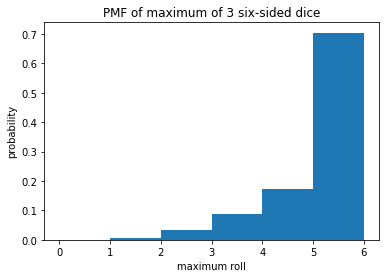

In [13]:
fig, ax = plt.subplots()
ax.hist(maxes.flatten(),
        bins=np.arange(7),
        density=True)
ax.set_title('PMF of maximum of 3 six-sided dice')
ax.set_xlabel('maximum roll')
ax.set_ylabel('probability');

In [ ]:
for x in range(1, 7):
    